Q1. What is Elastic Net Regression and how does it differ from other regression techniques?

Elastic Net Regression:

Elastic Net combines both L1 and L2 regularization by introducing a mixing parameter α.
The Elastic Net loss function is a linear combination of the L1 and L2 penalty terms.
The parameter α controls the balance between L1 and L2 regularization:
When α = 0, Elastic Net reduces to Ridge Regression.
When α = 1, Elastic Net reduces to Lasso Regression.
For 0 < α < 1, Elastic Net provides a compromise between the two techniques.
Elastic Net can perform both feature selection and coefficient shrinkage simultaneously.
It's well-suited when you have a large number of features, some of which are correlated, and you want to avoid the extreme selection behavior of Lasso while still addressing multicollinearity.

Q2. How do you choose the optimal values of the regularization parameters for Elastic Net Regression?

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

elastic_net = ElasticNet()

param_grid = {
    'alpha':[0.1,1.0,10.0],
    'l1_ratio':[0.2,0.5,0.8]
}

param_dist = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.2, 0.5, 0.8]
}

random_search= RandomizedSearchCV(elastic_net, param_distributions=param_dist, scoring='neg_mean_squared_error', cv=5, n_iter=10)

random_search.fit(X_train,y_train)

best_params = random_search.best_params_

best_elastic_net = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'])
best_elastic_net.fit(X_train, y_train)

y_pred = best_elastic_net.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(mse)

ImportError: cannot import name 'RandomSearchCV' from 'sklearn.model_selection' (/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/__init__.py)

Q3. What are the advantages and disadvantages of Elastic Net Regression?

Advantages:

Variable Selection: Like Lasso, Elastic Net can perform variable selection by encouraging some coefficients to become exactly zero. This can be very helpful when dealing with high-dimensional datasets, as it helps to identify the most important features.

Handles Multicollinearity: Elastic Net, through its L2 regularization component (Ridge), can handle multicollinearity among features. This makes it more robust when features are highly correlated.

Balance Between L1 and L2: The l1_ratio parameter in Elastic Net allows you to control the balance between L1 and L2 regularization. This parameter lets you customize the type and strength of regularization based on your problem. It can be particularly useful when you're unsure about the optimal regularization strategy.

Disadvantages:

Complexity: Elastic Net involves tuning two hyperparameters: alpha and l1_ratio. This can add complexity to the model selection process, especially when compared to simpler linear regression models.

Interpretability: While Elastic Net can perform variable selection and reduce the number of features, the resulting model might still be less interpretable compared to a traditional linear regression model with fewer predictors.

Data Scaling: Elastic Net, like other regression methods, can be sensitive to the scale of input features. It's generally a good practice to scale your features before applying Elastic Net.

Q4. What are some common use cases for Elastic Net Regression?

High-Dimensional Data: When dealing with datasets that have a large number of features (variables) compared to the number of observations, Elastic Net can be used to perform variable selection and handle the "curse of dimensionality."

Multicollinearity: Elastic Net is particularly useful when you have features that are highly correlated (multicollinearity). The L2 regularization component helps mitigate the instability in coefficient estimates that can arise in the presence of multicollinearity.

Predictive Modeling: Elastic Net can be used for predictive modeling tasks, such as regression analysis, where the goal is to predict a continuous target variable. It can provide a better balance between bias and variance compared to ordinary least squares regression.

Feature Selection: Elastic Net's L1 regularization component encourages some coefficients to become exactly zero, leading to automatic feature selection. This makes it valuable when you want to identify the most relevant features for your model.

Genomics and Bioinformatics: In fields like genomics and bioinformatics, where datasets often have a large number of genes or biomarkers but a relatively small number of samples, Elastic Net can help in identifying relevant genes or markers associated with certain outcomes.

Q5. How do you interpret the coefficients in Elastic Net Regression?

Magnitude of Coefficients: The magnitude of the coefficients reflects the strength of the relationship between a predictor (feature) and the target variable. Larger coefficients indicate a stronger influence of the predictor on the target variable.

Sign of Coefficients: The sign of the coefficients (positive or negative) indicates the direction of the relationship between the predictor and the target variable. A positive coefficient suggests that an increase in the predictor's value leads to an increase in the target variable, while a negative coefficient suggests the opposite.

Coefficient Magnitude and Variable Importance: In Elastic Net, due to the L1 regularization, some coefficients can be exactly zero. This means that the corresponding predictors are effectively excluded from the model. Predictors with non-zero coefficients are considered important predictors that contribute to the model's predictions.

Coefficient Spread: The L2 regularization component in Elastic Net helps in dealing with multicollinearity. It can result in more stable coefficient estimates by spreading the impact of correlated predictors across them.

l1_ratio Impact: The value of the l1_ratio hyperparameter in Elastic Net affects the type of regularization applied. A higher l1_ratio value puts more emphasis on L1 regularization, potentially leading to more coefficients being exactly zero. A lower l1_ratio value emphasizes L2 regularization.

Q6. How do you handle missing values when using Elastic Net Regression?

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


X = np.random.rand(100,5)
y = np.random.rand(100)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')

scaler = StandardScaler()

elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)

pipeline = Pipeline([
    ('imputer',imputer),
    ('scaler',scaler),
    ('elastic_net',elastic_net)
])

pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)

print(f"R-squared score: {score:.2f}")
score

R-squared score: -0.04


-0.0408031743180548

Q7. How do you use Elastic Net Regression for feature selection?

Selected features: [0 1 2 3 4 5 6 7 8 9]


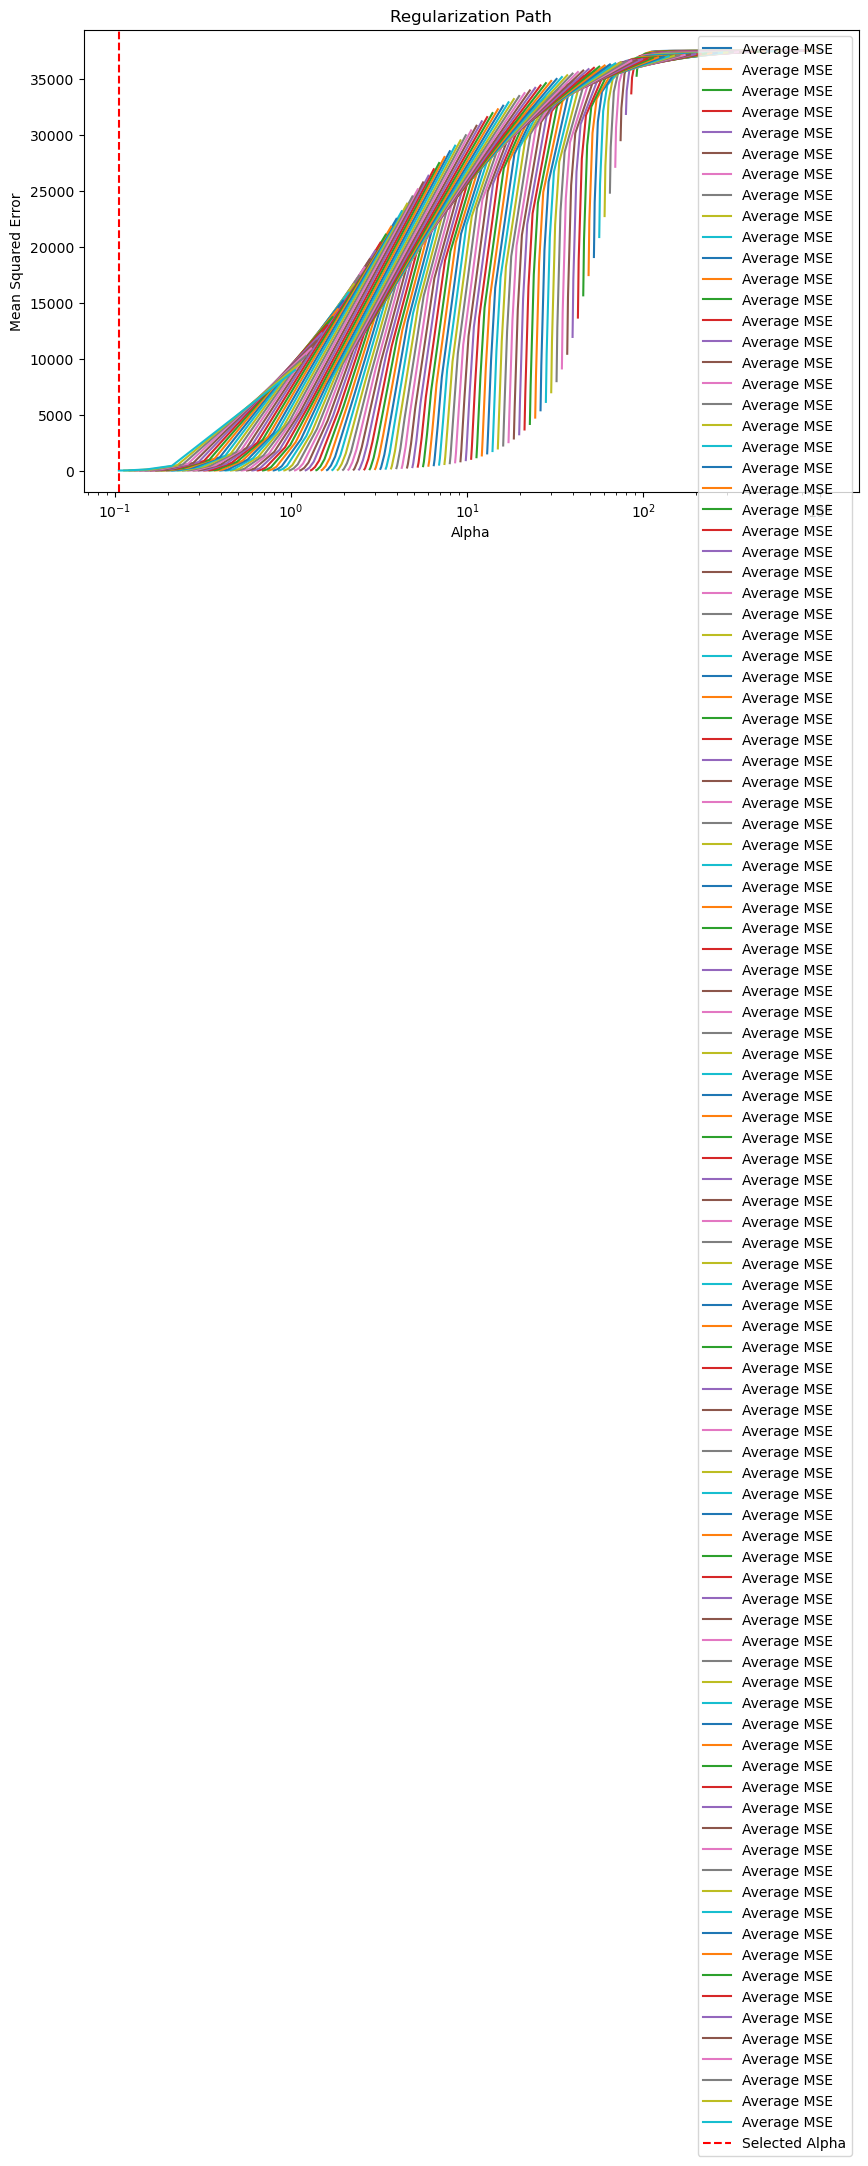

In [11]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNetCV
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_regression(n_samples=100, n_features=10, noise=0.5, random_state=42)

elastic_net = ElasticNetCV(l1_ratio=[0.1,0.5,0.7,0.9,0.95,0.99,1], cv=5,random_state=42)

elastic_net.fit(X,y)

selected_features = np.where(elastic_net.coef_ != 0)[0]

print("Selected features:", selected_features)

plt.figure(figsize=(10,6))
plt.plot(elastic_net.alphas_, elastic_net.mse_path_.mean(axis=-1), label="Average MSE")
plt.axvline(elastic_net.alpha_, linestyle="--", color="r", label="Selected Alpha")
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error")
plt.title("Regularization Path")
plt.xscale("log")
plt.show()

Q8. How do you pickle and unpickle a trained Elastic Net Regression model in Python?

In [3]:
import pickle
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=10, noise=0.5, random_state=42)

elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net.fit(X,y)

with open("elastic_net_model.pkl","wb") as f:
    pickle.dump(elastic_net,f)
    
with open("elastic_net_model.pkl","rb") as f:
    loaded_elastic_net = pickle.load(f)

    
import numpy as np

# Example new data for prediction
new_data = np.array([[0.2, 0.3, 0.5, 0.1, 0.9]])

# Make predictions using the loaded Elastic Net model
predictions = loaded_elastic_net.predict(new_data)

print("Predicted values:", predictions)


ValueError: X has 5 features, but ElasticNet is expecting 10 features as input.

Q9. What is the purpose of pickling a model in machine learning?

Pickling a model in machine learning refers to the process of serializing (converting) a trained machine learning model into a format that can be saved to a file or transferred over a network, and later deserialized (converted back to its original form) for further use. The primary purpose of pickling a model is to save its state so that it can be easily reused without needing to retrain it every time you want to make predictions or perform other tasks. Here are some common purposes and benefits of pickling a model